In [ ]:
#LinearRegression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset
dataset = pd.read_csv('salary_data.csv')
dataset

,YearsOfExperience,Salary
0,1.2,38976
1,1.3,45897
2,1.5,36987
3,1.4,40587
4,1.3,42984
5,1.7,47986
6,2.0,44578
7,2.2,38789
8,2.4,46986
9,2.6,47986


In [ ]:
X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 74112.71939557,  82662.88348193, 104513.30281375,  81712.86525012,
        54162.33652739,  39912.06305012,  90263.02933648, 108313.37574102,
        93113.08403193,  63662.51884557,  38012.02658648,  53212.31829557,
        76012.75585921, 100713.22988648,  82662.88348193, 102613.26635012,
       113063.46690012,  46562.19067285,  58912.42768648,  83612.90171375])

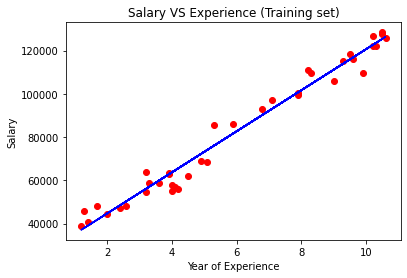

In [ ]:
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.title('Salary VS Experience (Training set)')
viz_train.show()

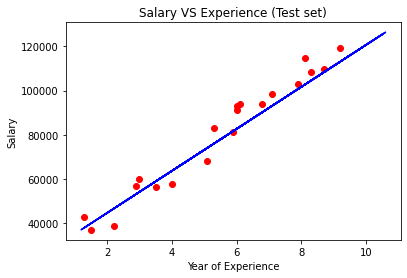

In [ ]:
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

In [ ]:
print("Equation of the resulting regression line is: y = ", regressor.coef_,"*x + ",regressor.intercept_)

pd.DataFrame({'x_test':list(X_test), 'y_test':list(y_test), 'y_pred':list(y_pred)})

Equation of the resulting regression line is: y =  [9500.18231818] *x +  25661.789572846363


,x_test,y_test,y_pred
0,[5.1],67938,74112.719396
1,[6.0],91029,82662.883482
2,[8.3],108374,104513.302814
3,[5.9],81293,81712.865250
4,[3.0],60150,54162.336527
5,[1.5],36987,39912.063050
6,[6.8],93847,90263.029336
7,[8.7],109893,108313.375741
8,[7.1],98376,93113.084032
9,[4.0],57643,63662.518846


Without Libraries

In [ ]:

import pandas as pd
from math import pow


def get_headers(dataframe):
    return dataframe.columns.values


def cal_mean(readings):
    readings_total = sum(readings)
    number_of_readings = len(readings)
    mean = readings_total / float(number_of_readings)
    return mean


def cal_variance(readings):
    readings_mean = cal_mean(readings)
    mean_difference_squared_readings = [pow((reading - readings_mean), 2) for reading in readings]
    variance = sum(mean_difference_squared_readings)
    return variance / float(len(readings) - 1)


def cal_covariance(readings_1, readings_2):
    readings_1_mean = cal_mean(readings_1)
    readings_2_mean = cal_mean(readings_2)
    readings_size = len(readings_1)
    covariance = 0.0
    for i in range(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    return covariance / float(readings_size - 1)


def cal_simple_linear_regression_coefficients(x_readings, y_readings):
    b1 = cal_covariance(x_readings, y_readings) / float(cal_variance(x_readings))
    b0 = cal_mean(y_readings) - (b1 * cal_mean(x_readings))
    return b0, b1


def predict_target_value(x, b0, b1):

    return b0 + b1 * x


def cal_rmse(actual_readings, predicted_readings):

    square_error_total = 0.0
    total_readings = len(actual_readings)
    for i in range(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    return rmse


def simple_linear_regression(dataset,alpha):
    
    dataset_headers = get_headers(dataset)
    print ("Dataset Headers :: ", dataset_headers)
    
    Y_mean = cal_mean(dataset[dataset_headers[0]])
    X_mean = cal_mean(dataset[dataset_headers[1]])
    Y_variance = cal_variance(dataset[dataset_headers[0]])
    X_variance = cal_variance(dataset[dataset_headers[1]])
    covariance_of_X_and_Y = dataset.cov()[dataset_headers[0]][dataset_headers[1]]
    w1 = covariance_of_X_and_Y / float(Y_variance)
    w0 = X_mean - (w1 * Y_mean)
    res=float(w0)+(float(w1)*alpha)
    mse=(pow.sqrt((Y_test-y_pred)**2))/len(Y_test)
    print("Predicted Value for 86 is :",res)
    print("Mean Squared Error is : ",mse)

if __name__ == "__main__":

    input_path = "dataset.csv"
    data = pd.read_csv(input_path)
    alpha=86
    simple_linear_regression(data,alpha)